# IMPORTING LIBRARIES AND DATA

IMPORTING LIBRARIES

In [180]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

IMPORTING DATA/DATASET

In [181]:
ab = pd.read_csv('abalone.csv')

LOADING FIRST 5 ROWS

In [182]:
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


observing data

In [183]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are 7 float, 1 integer and 1 object

In [184]:
ab.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

OBSERVING NUMBER OF ROWS AND COLUMS

In [185]:
print("Rows, columns: " + str(ab.shape))

Rows, columns: (4177, 9)


CHECKING FOR NULL(NA) VALUES

In [186]:
print(ab.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


OBSERVATIONS:

NO null value found

CHECKING FOR MISSING VALUES

In [187]:
print(ab.eq('').sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


OBSERVATIONS:


          No missing values in the dataset
          All numerical features but 'sex'
          Though features are not normaly distributed, are close to normality
          None of the features have minimum = 0 except Height (requires re-check)
          Each feature has difference scale range

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

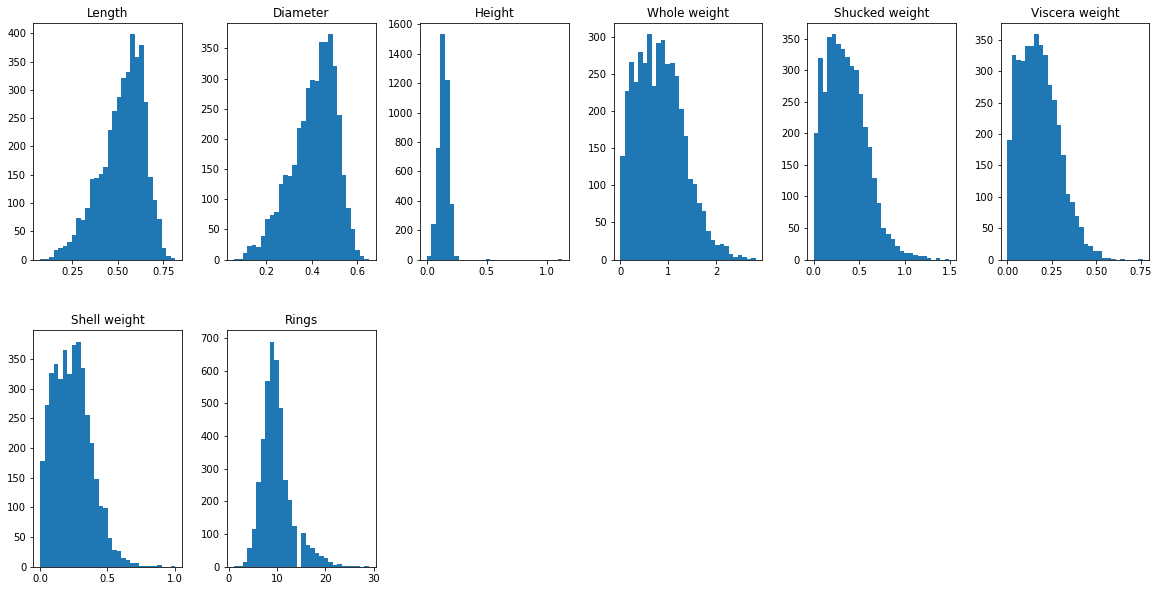

In [188]:
ab.hist(figsize=(20,10), grid=False, layout=(2, 6), bins = 30)

Skewness can be clearly observed in most of features

Separating numerical and categorical features

In [189]:
numerical_features = ab.select_dtypes(include=[np.number]).columns


In [190]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [191]:
categorical_features = ab.select_dtypes(include=[np.object]).columns

In [192]:
categorical_features

Index(['Sex'], dtype='object')

Deleting the hight data which is 0 or less

In [193]:
ab = ab[ab.Height > 0]

In [194]:
ab.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


In [195]:
ab.describe() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The above chart is an updater datasheet after removal of 0 or less than 0 values form height feature

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


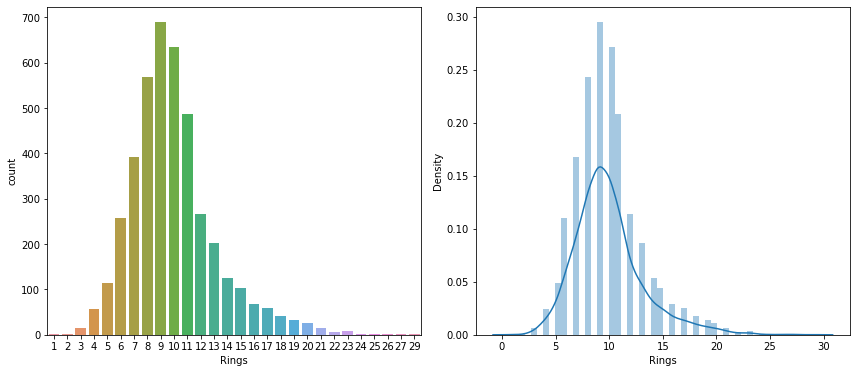

In [196]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(ab.Rings)

plt.subplot(2,2,2)
sns.distplot(ab.Rings)
plt.tight_layout()

In [197]:
It seems that the label value is skewed after 15 years of age. We will deal with that in a latter

SyntaxError: invalid syntax (<ipython-input-197-e736a1e38987>, line 1)

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(ab) 

In [ ]:
ab.corr()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(ab.corr(), annot=True)

It seems the most of the features are corelated with the length, if the length is more, weight will be more, height will be more and dimeter will be more, but our job is to predict age. 

In [ ]:
ab.corr().Rings.sort_values(ascending=False) 

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(ab['Shell weight'],ab['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(ab['Diameter'],ab['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(ab['Height'],ab['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(ab['Length'],ab['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(ab['Whole weight'],ab['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(ab['Viscera weight'],ab['Rings'])

plt.tight_layout()

In [ ]:
The above visualization shows the bivariate analysis and also few outliers are observe 

In [ ]:
new_ab = ab[ab.Rings < 16]
new_ab = new_ab[new_ab.Rings > 2]

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=new_ab, x='Rings', y='Length') 

In [ ]:
new_ab.head()

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(new_ab['Shell weight'],new_ab['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(new_ab['Diameter'],new_ab['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(new_ab['Height'],new_ab['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(new_ab['Length'],new_ab['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(new_ab['Whole weight'],new_ab['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(new_ab['Viscera weight'],new_ab['Rings'])

plt.tight_layout()

There are outliers that can be removed

In [ ]:
new_ab = new_ab[new_ab.Height < 0.4]

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
sns.boxplot(data= new_ab, x = 'Rings', y = 'Diameter')

plt.subplot(3,2,2)
sns.boxplot(data= new_ab, x = 'Rings', y = 'Length')

plt.subplot(3,2,3)
sns.boxplot(data= new_ab, x = 'Rings', y = 'Height')

plt.subplot(3,2,4)
sns.boxplot(data= new_ab, x = 'Rings', y = 'Shell weight')

plt.subplot(3,2,5)
sns.boxplot(data= new_ab, x = 'Rings', y = 'Whole weight')

plt.subplot(3,2,6)
sns.boxplot(data= new_ab, x = 'Rings', y = 'Viscera weight')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(new_ab.Rings)

plt.subplot(2,2,2)
sns.distplot(new_ab.Rings)



plt.tight_layout()

Data looks normalized but we can observe from the the changes in all the variable looks constant after 11 years. 
more segregation of the data can be done from  3 to 15 to 3 to 10 for better resulls.

# Preparing Data for Modelling

In [ ]:
new_ab.columns

In [ ]:
new_col = pd.get_dummies(new_ab.Sex)
new_ab[new_col.columns] = new_col

In [ ]:
new_ab.columns

Splitting the dataset 

In [ ]:
feature = new_ab.drop(['Sex', 'Rings'], axis = 1)
label = new_ab.Rings

Scaling the data set

In [ ]:
from sklearn.preprocessing import StandardScaler
convert = StandardScaler()
feature = convert.fit_transform(feature)

In [ ]:
feature.shape, label.shape

In [ ]:
from sklearn.model_selection import train_test_split
f_train, f_test, l_train, l_test = train_test_split(feature, label, random_state = 23, test_size = 0.2)

Using linear regression

In [ ]:
model = linear_model.LinearRegression()
model.fit(f_train, l_train)
r2_score(l_train, model.predict(f_train))

The accuracy using linear regression is 53%

Using polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4) 

feature_train = poly.fit_transform(f_train)

In [ ]:
poly_model = linear_model.LinearRegression()
poly_model.fit(feature_train, l_train)
r2_score(l_train, poly_model.predict(feature_train)) 

The accuracy using polynomial Features is 68%

In [ ]:
Using Ridge Regression

In [ ]:
ridge_model = linear_model.Ridge()
ridge_model.fit(f_train, l_train)
r2_score(l_train, ridge_model.predict(f_train)) 

The accuracy using Ridge Regression is 53%

Using Descision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(f_train, l_train)
r2_score(l_train, tree_model.predict(f_train))

In [ ]:
The accuracy using Descision Tree is 100%  which is overfitting

In [ ]:
r2_score(l_test, tree_model.predict(f_test)) 

In [ ]:
Also this model poorly preforms on other data test

In [ ]:
Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(f_train, l_train)
r2_score(l_train, random_model.predict(f_train))

In [ ]:
The accuracy using Random Forest is 93%

In [ ]:
r2_score(l_test, random_model.predict(f_test)) 

Hyper Parameter tuning

In [ ]:
random_model.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(random_model, params, cv = 3)


In [ ]:
grid_search.fit(f_train, l_train) 

In [ ]:
grid_search.best_estimator_

In [ ]:
new_random = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators= 100 )

In [ ]:
new_random.fit(f_train, l_train)
r2_score(l_train, new_random.predict(f_train)) 

best accuracy score is 0.79

In [ ]:
grid_search.best_params_

Best parameters are max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10,'n_estimators': 200

Saving Model

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_,"abalone_age.obj")